# 1. Laboratorijske vježbe iz Numeričke matematike (zad8) 

Ime i prezime: Mihael Miličević

Zadan je rubni problem 
$$a u''(x)-u'(x)=e^x \quad 0<x<1\quad a>0$$
$$u(0)=0, \quad u(1)=0$$

a) Ovaj problem ima analitičko rješenje koje je jednako
$$u(x)=\frac{e^{\frac{x}{a}}(1-e)+e^x(e^{\frac{1}{a}}-1)+e-e^{\frac{1}{a}}}{(e^{\frac{1}{a}}-1)(a-1)}$$
Koristeći biblioteku **matplotlib** nacrtajte ovo rješenje za dva volji odabrana $a.$ 

In [166]:
import matplotlib.pyplot as plt
import numpy as np
from math import e, pow

x = np.linspace(0, 1, 10000)

def f(x, a):
    return (pow(e, x/a) * (1 - e) + pow(e, x) * (pow(e, 1/a) - 1) + e - pow(e, 1/a)) / ((pow(e, 1/a) - 1) * (a - 1))

m = np.vectorize(f , excluded=['a'])

Parametar a jednak je 0.01.

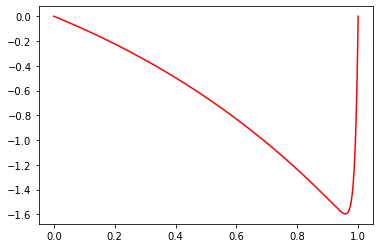

In [167]:
u = m(x,0.01)
fig = plt.figure()
plt.plot(x,u,'r')

Parametar a jednak je 2.

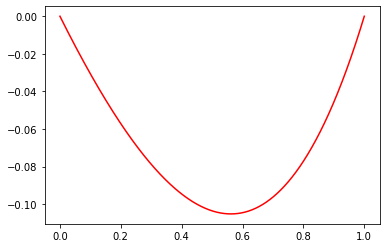

In [168]:
u = m(x,2)
fig = plt.figure()
plt.plot(x,u,'r')

b) Koristeći centralne diferencije diskretizirajte rubni problem kao što smo to radili na predavanjima (u 4. predavanju -trodijagonalni sustavi te u prošlogodišnjem 7. predavanju, drugi dio predavanja)
Ovdje u Markdown ćeliju zapišite koji sustav dobivate za ako uzmete uniformnu mrežu na [0,1], odnosno točke $$\{x_0=0,x_1,x_2,\ldots , x_n, x_{n+1}=1\},$$ gdje je $$x_i=x_0+ih, \ i=1,2,3,\ldots, n.$$
Sustav zapišite za $n=5$. (Pisanje matrica provjerite u nekom od *.ipynb s predavanja )

Rekurzivna jednadžba:

$$ (2 a - h) u_{i+1} - 4 a u_{i} + (2 a + h) u_{i-1} = 2 h^2 e^x $$

Sustav jednadžbi:

$$ (2 a - h) u_{2} - 4 a u_{1} + (2 a + h) u_{0} = 2 h^2 e^x $$
$$ (2 a - h) u_{3} - 4 a u_{2} + (2 a + h) u_{1} = 2 h^2 e^x $$
$$ (2 a - h) u_{4} - 4 a u_{3} + (2 a + h) u_{2} = 2 h^2 e^x $$
$$ (2 a - h) u_{5} - 4 a u_{4} + (2 a + h) u_{3} = 2 h^2 e^x $$
$$ (2 a - h) u_{6} - 4 a u_{5} + (2 a + h) u_{4} = 2 h^2 e^x $$

Uvrstimo $ u(0) = u_0 = 0 $, $ u(1) = u_6 = 0 $, $ h = \frac{1}{6} $ i dobijemo:

$$ (2 a - \frac{1}{6}) u_{2} - 4 a u_{1} = \frac{1}{18} e^x $$
$$ (2 a - \frac{1}{6}) u_{3} - 4 a u_{2} + (2 a + \frac{1}{6}) u_{1} = \frac{1}{18} e^x $$
$$ (2 a - \frac{1}{6}) u_{4} - 4 a u_{3} + (2 a + \frac{1}{6}) u_{2} = \frac{1}{18} e^x $$
$$ (2 a - \frac{1}{6}) u_{5} - 4 a u_{4} + (2 a + \frac{1}{6}) u_{3} = \frac{1}{18} e^x $$
$$ - 4 a u_{5} + (2 a + \frac{1}{6}) u_{4} = \frac{1}{18} e^x $$

Matrica sustava:

$$
\begin{bmatrix}
-4 a & 2 a - \frac{1}{6} & 0 & 0 & 0\\
2 a + \frac{1}{6} & -4 a & 2 a - \frac{1}{6} & 0 & 0\\
0 & 2 a + \frac{1}{6} & -4 a & 2 a - \frac{1}{6} & 0\\
0 & 0 & 2 a + \frac{1}{6} & -4 a & 2 a - \frac{1}{6}\\
0 & 0 & 0 & 2 a + \frac{1}{6} & -4 a\\
\end{bmatrix}
$$

In [169]:
a = 2
A=np.array([[-4*a,2*a-1/6,0,0,0], [2*a+1/6,-4*a,2*a-1/6,0,0], [0,2*a+1/6,-4*a,2*a-1/6,0], [0,0,2*a+1/6,-4*a,2*a-1/6], [0,0,0,2*a+1/6,-4*a]])
print(A)

[[-8.          3.83333333  0.          0.          0.        ]
 [ 4.16666667 -8.          3.83333333  0.          0.        ]
 [ 0.          4.16666667 -8.          3.83333333  0.        ]
 [ 0.          0.          4.16666667 -8.          3.83333333]
 [ 0.          0.          0.          4.16666667 -8.        ]]


c) Neka je sada $a=2$ i $n=16$. Riješite dobiveni sustav Thomasovim algoritmom te skicirajte dobivenu aproksimaciju. 

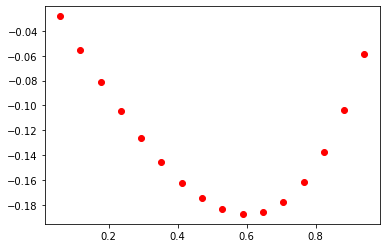

In [173]:
def LUdecomptridiagonal(a,b,c):
    n=len(b)
    for k in range(1,n):
        mu=a[k-1]/b[k-1]
        b[k]=b[k]-mu*c[k-1]
        a[k-1]=mu
    return a,b,c

def LUsolvetridiagonal(a,b,c,f):
    n=len(b)
    for k in range(1,n):
        f[k]=f[k]-a[k-1]*f[k-1]
    f[n-1]=f[n-1]/b[n-1]
    for k in range(n-2,-1,-1):
        f[k]=(f[k]-c[k]*f[k+1])/b[k]
    return f

def  set_abcf(x, alpha, beta, omega):
    n=len(x)-2
    h=1.0/(n+1)
    x2 = x[1:len(x)-1]
    fun = np.vectorize(lambda x: pow(e, x))
    f=fun(x2)*2*h*h
    b=np.ones((n))* -4.0 * omega
    a=np.ones((n-1))* (2*omega+h)
    c=np.ones((n-1))* (2*omega-h)
    for i in range(1,n+1):
        f[i-1]=f[i-1]*RHS_b(x[i])
    f[0]=f[0]+alpha
    f[n-1]=f[n-1]+ beta
    return a, b, c, f

def RHS_b(x):
    return pow(e, x)

omega = 2
n1=16
n11=n1+2
x1=np.linspace(0,1,n11)

a,b,c,f=set_abcf(x1,0,0, omega)
a,b,c=LUdecomptridiagonal(a,b,c)
u=LUsolvetridiagonal(a,b,c,f)

n=len(x1)
plt.plot(x1[1:n-1],u, "ro")

d) Neka je sada $a=0.01$ i $n=16$. Riješite dobiveni sustav Thomasovim algoritmom te skicirajte dobivenu aproksimaciju 

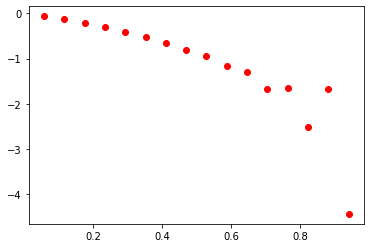

In [178]:
omega = 0.01
n1=16
n11=n1+2
x1=np.linspace(0,1,n11)

a,b,c,f=set_abcf(x1,0,0, omega)
a,b,c=LUdecomptridiagonal(a,b,c)
u=LUsolvetridiagonal(a,b,c,f)

n=len(x1)
plt.plot(x1[1:n-1],u, "ro")

e)  Sve isto kao po c) i d) za $n=100$

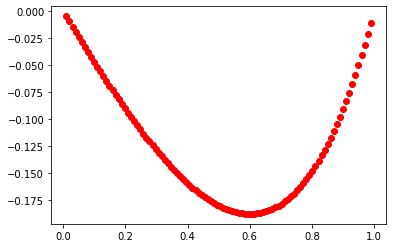

In [180]:
omega = 2
n1=100
n11=n1+2
x1=np.linspace(0,1,n11)

a,b,c,f=set_abcf(x1,0,0, omega)
a,b,c=LUdecomptridiagonal(a,b,c)
u=LUsolvetridiagonal(a,b,c,f)

n=len(x1)
plt.plot(x1[1:n-1],u, "ro")

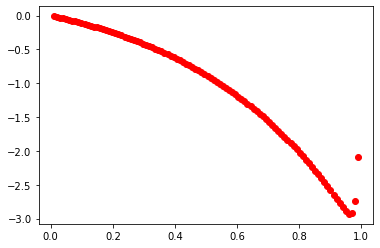

In [183]:
omega = 0.01
n1=100
n11=n1+2
x1=np.linspace(0,1,n11)

a,b,c,f=set_abcf(x1,0,0, omega)
a,b,c=LUdecomptridiagonal(a,b,c)
u=LUsolvetridiagonal(a,b,c,f)

n=len(x1)
plt.plot(x1[1:n-1],u, "ro")